In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("/content/Universities.csv")

In [8]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaled_df= scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [25]:
WSCC = []

In [12]:
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(scaled_df)
  WSCC.append(kmeans.inertia_)

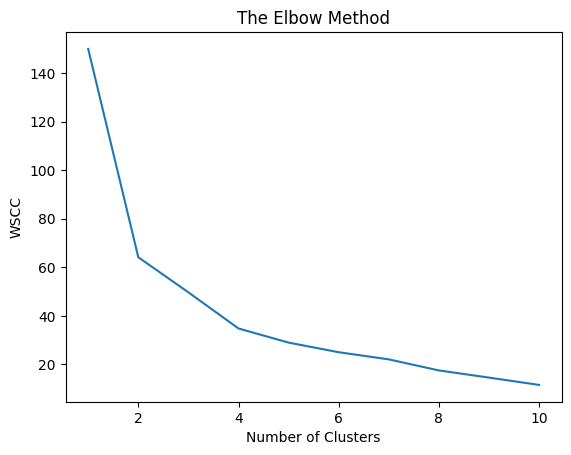

In [13]:
plt.plot(range(1,11),WSCC)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSCC')
plt.show()

In [14]:
WSCC

[149.99999999999997,
 64.1452839501027,
 49.69054164653248,
 34.79612750585773,
 28.968669047324088,
 25.012005085561192,
 22.058835963741735,
 17.503463690174225,
 14.550294568354763,
 11.53464175417217]

In [15]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict = kmeans.fit_predict(scaled_df)

In [16]:
predict

array([3, 2, 1, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 0, 3, 0, 3, 0, 1, 1, 0, 1,
       1, 0, 3], dtype=int32)

In [26]:
cluster_new= KMeans(n_clusters=3,random_state=0)

new_predict =  cluster_new.fit_predict(scaled_df)

In [27]:
cluster_new.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1], dtype=int32)

In [30]:
new_predict

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1], dtype=int32)

In [32]:
df["clusterid_new"]= new_predict

In [33]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [36]:
df.groupby("clusterid_new").agg("mean", numeric_only=True).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,1085.200000,44.000000,69.600000,18.600000,11056.400000,74.400000
1,1,1306.388889,84.277778,31.277778,11.777778,28175.111111,90.444444
2,2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000


In [37]:
df[df["clusterid_new"]==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
13,PennState,1081,38,54,18,10185,80,0
15,Purdue,1005,28,90,19,9066,69,0
17,TexasA&M,1075,49,67,25,8704,67,0
20,UMichigan,1180,65,68,16,15470,85,0
23,UWisconsin,1085,40,69,15,11857,71,0


In [38]:
df[df["clusterid_new"]==0].shape[0]

5

In [39]:
df[df["clusterid_new"]==1].shape[0]

18

In [40]:
df[df["clusterid_new"]==2].shape[0]

2